In [113]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import pickle
import estimator as e
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [114]:
with open("ecb.pkl" , "rb") as f:
    ecb = pickle.load(f)
    ecb.sort_index(inplace=True)
    
with open("fed.pkl" , "rb") as f:
    fed = pickle.load(f)
    fed.sort_index(inplace=True)

with open("data.pkl" , "rb") as f:
    data = pickle.load(f)
    data.sort_index(inplace=True)

W = fed[["Numeric Change"]]
Y = data[["USURTOT Index"]]

In [115]:
estimator= e.Estimator(W, Y,treatment="Numeric Change", outcome="USURTOT Index")
estimator.compute_estimator( p=10, h=5, w=50, w_prime=0, min_obs=20)

0.002166373815735525

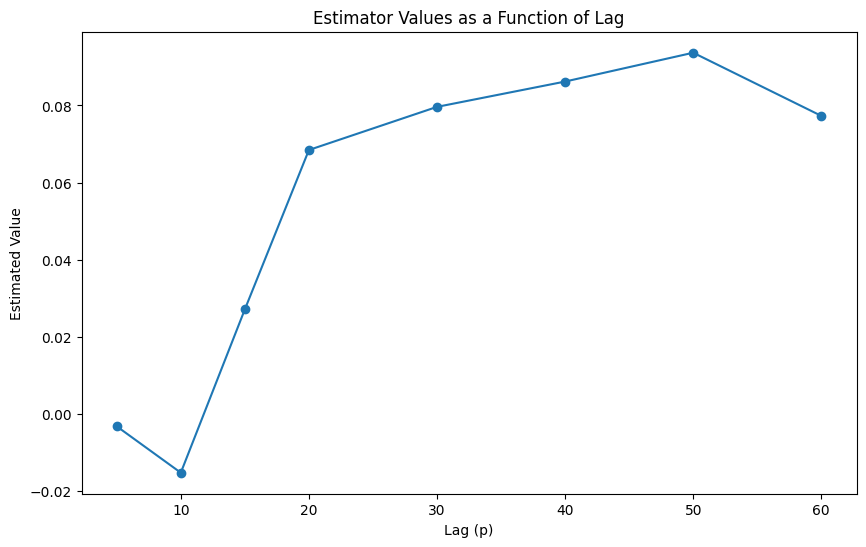

In [123]:
estimator.plot_effect( h=5, w=25, w_prime=0, p_range=[5,10,15,20,30,40,50,60], min_obs=30)